In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
import matplotlib.pyplot as plt
#from sklearn.metrics import score

In [3]:

# Read the data
df = pd.read_csv('datacleaned_running_data.csv', header=0)

In [4]:
# Drop unnecessary columns
df = df.drop(columns=['Activity Date'])

In [5]:
# Define features (X) and target (y) variables
X = df.drop(columns=['Activity ID', 'Activity Name', 'Activity Type', 'Commute', 'Filename', 'Athlete Weight',
                     'Average Grade', 'Commute.1'])
y = df['Distance']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train

,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Elevation Gain,Elevation Low,Elevation High,Max Grade,Max Cadence,Average Cadence,Average Heart Rate,Calories,Relative Effort.1
237,3662,10.85,203.0,149.0,3662.0,3625.0,10849.200195,3.900000,92.370384,68.000000,104.599998,16.799999,81.0,79.521965,165.402603,676.0,149.0
203,7354,18.77,179.0,181.0,7354.0,6491.0,18774.199219,52.900002,79.245651,7.000000,41.500000,19.600000,83.0,80.004875,156.000320,1107.0,181.0
229,2795,8.10,176.0,103.0,2795.0,2771.0,8104.799805,3.900000,76.523071,85.699997,128.399994,23.200001,83.0,77.401672,163.349594,512.0,103.0
396,3494,10.02,169.0,65.0,3494.0,3422.0,10024.599609,3.800000,65.926346,4.600000,21.500000,35.599998,87.0,82.963753,151.000000,699.0,65.0
22,5828,16.62,171.0,157.0,5828.0,5788.0,16627.900391,3.800000,48.517548,6.800000,21.900000,15.800000,117.0,82.410126,153.432770,1157.0,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,4283,12.05,178.0,113.0,4283.0,4177.0,12051.099609,4.800000,51.823967,6.800000,19.799999,7.000000,83.0,79.874069,153.985306,712.0,113.0
270,3544,9.97,175.0,42.0,3544.0,3537.0,9974.700195,4.600000,105.136986,64.300003,112.000000,13.800000,83.0,81.720375,140.740982,663.0,42.0
348,9104,24.06,192.0,278.0,9104.0,8301.0,24064.900391,3.900000,43.000000,-2.200000,26.299999,33.299999,92.0,81.076103,171.000000,1648.0,278.0
435,4613,10.09,159.0,40.0,4613.0,3352.0,10096.400391,4.100000,136.016220,-0.800000,33.599998,36.200001,85.0,82.898987,144.000000,682.0,40.0


In [8]:
# Create a polynomial regression model
polynomial_features = PolynomialFeatures(degree=2)
X_train_transformed = polynomial_features.fit_transform(X_train)

In [9]:
linear_regression = LinearRegression()
linear_regression.fit(X_train_transformed, y_train)

LinearRegression()

In [10]:
# Predict the test set results
y_test_pred = linear_regression.predict(polynomial_features.fit_transform(X_test))

In [11]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_test_pred)

In [12]:
print("Mean Squared Error:", mse)

Mean Squared Error: 5.814189717944794e-13


In [13]:
# Calculate R^2 score
r2_score = r2_score(y_test, y_test_pred, multioutput='variance_weighted')
print("R^2 Score:", r2_score)

R^2 Score: 0.9999999999999875


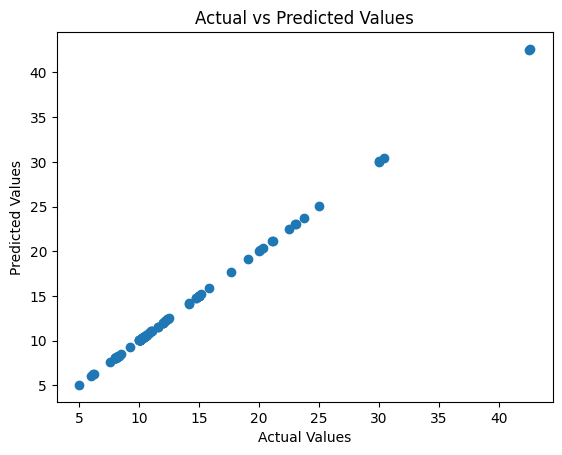

In [14]:
# Plot actual vs predicted values
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()